In [28]:
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from time import time
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FactorAnalysis
from sklearn.datasets import load_breast_cancer

In [53]:
n4kmeans=10
n4gmm=7

n4pca=10
n4ica=7
n4rp=10
n4fa=10

ks_kmeans = [2, 4, 6, 8, 10, 15, 20, 30, 50,80]
ks_gmm = [2, 4, 6, 8, 10, 15, 20, 30, 50,80]

# figsize
size = (10, 6)
data_set = pd.read_csv('winequality-red.csv',sep=';')
X = data_set.iloc[:, 0:11]
y = data_set.iloc[:, -1]
scaler = StandardScaler()
scaler.fit(X)

data_scaled = scaler.transform(X)
X = pd.DataFrame(data=data_scaled, columns=X.columns)
pca = PCA(n_components=n4pca)
pca.fit(X)
X_pca = pca.transform(X)

ica = FastICA(n_components=n4ica)
ica.fit(X)
X_ica = ica.transform(X)

rp = GaussianRandomProjection(n_components=n4rp)
rp.fit(X)
X_rp = rp.transform(X)

fa = FactorAnalysis(n_components=n4rp)
fa.fit(X)
X_fa = fa.transform(X)

Xs = [X_pca, X_ica, X_rp, X_fa]
names = ['PCA', 'ICA', 'RP', 'FA']

# Kmeans

In [54]:
time_kmeans = {'PCA': [], 'ICA': [], 'RP': [], 'FA': []}
silhouette_kmeans = {'PCA':[], 'ICA':[], 'RP':[], 'FA':[]}
ami_kmeans = {'PCA': [], 'ICA': [], 'RP': [], 'FA': []}

In [55]:
res_kmeans = []

for k in ks_kmeans:
    result = []

    estimator = KMeans(n_clusters=k)

    for data, algo in zip(Xs, names):

        t0 = time()
        estimator.fit(data)
        fit_time = time() - t0
        # results = [name, fit_time, estimator[-1].inertia_]

        silhouette = metrics.silhouette_score(
                        data,
                        estimator.labels_,
                        metric="euclidean",
                        sample_size=300,
                    )
        
        ami = metrics.adjusted_mutual_info_score(y, estimator.labels_)

        time_kmeans[algo].append(fit_time)
        silhouette_kmeans[algo].append(silhouette)
        ami_kmeans[algo].append(ami)




## Plot: time, silhouette, ami

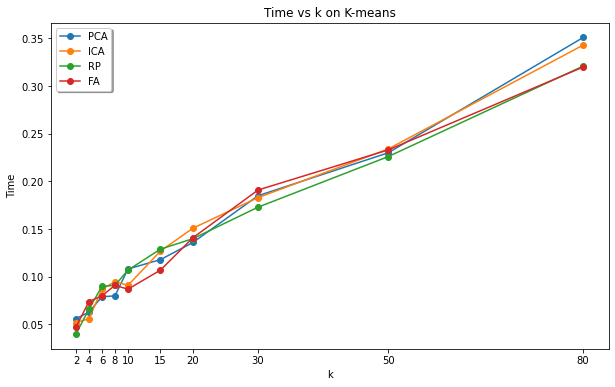

In [56]:
# time
fig, g = plt.subplots(1, 1, figsize=size)
for algo in names:
    plt.xticks(ks_kmeans, ks_kmeans)
    # plt.setp(g, xticks=ks, xticklabels=ks)
    g.set_title("Time vs k on K-means")
    g.set_ylabel('Time')
    g.set_xlabel('k')
    g.plot(ks_kmeans, time_kmeans[algo], label=algo, marker='o')
    g.legend(shadow=True, fancybox=True)


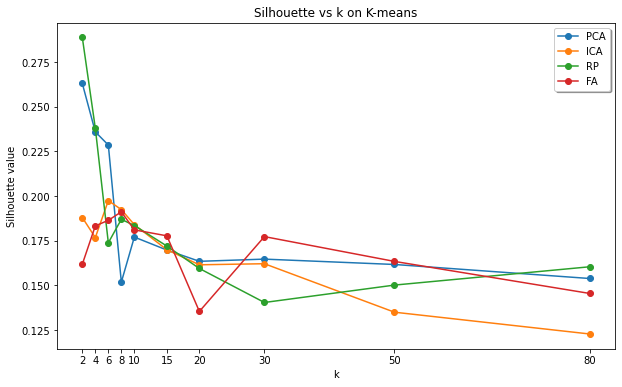

In [57]:
# Silhouette
fig, g = plt.subplots(1, 1, figsize=size)
for algo in names:
    plt.xticks(ks_kmeans, ks_kmeans)
    # plt.setp(g, xticks=ks, xticklabels=ks)
    g.set_title("Silhouette vs k on K-means")
    g.set_ylabel('Silhouette value')
    g.set_xlabel('k')
    g.plot(ks_kmeans, silhouette_kmeans[algo], label=algo, marker='o')
    g.legend(shadow=True, fancybox=True)


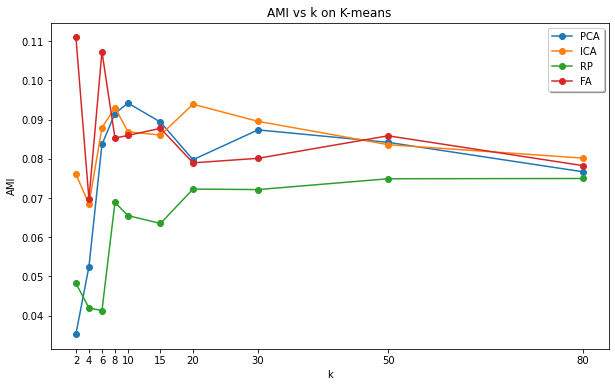

In [58]:
# ami
fig, g = plt.subplots(1, 1, figsize=size)
for algo in names:
    plt.xticks(ks_kmeans, ks_kmeans)
    # plt.setp(g, xticks=ks, xticklabels=ks)
    g.set_title("AMI vs k on K-means")
    g.set_ylabel('AMI')
    g.set_xlabel('k')
    g.plot(ks_kmeans, ami_kmeans[algo], label=algo, marker='o')
    g.legend(shadow=True, fancybox=True)


## Pick best k and output their silhouette and ami value

In [62]:
best_ks_kmeans = {'PCA': None, 'ICA': None, 'RP': None, 'FA': None}

In [63]:
print("\tbest k\tSilhouette\tNMI")
for algo in names:
    print(algo, end='\t')
    best_ks_kmeans[algo] = ks_kmeans[np.argmax(ami_kmeans[algo])]
    print(best_ks_kmeans[algo], end='\t')
    print('%.4f'%silhouette_kmeans[algo][ks_kmeans.index(best_ks_kmeans[algo])], end='\t\t')
    print('%.4f' % ami_kmeans[algo]
          [ks_kmeans.index(best_ks_kmeans[algo])], end='\n')


	best k	Silhouette	NMI
PCA	10	0.1770		0.0942
ICA	20	0.1615		0.0939
RP	80	0.1604		0.0750
FA	2	0.1618		0.1110


In [37]:
print("Remember to compare with the initial performance of the model!")


Remember to compare with the initial performance of the model!


# GMM

In [38]:
time_gmm = {'PCA': [], 'ICA': [], 'RP': [], 'FA': []}
silhouette_gmm = {'PCA':[], 'ICA':[], 'RP':[], 'FA':[]}
ami_gmm = {'PCA': [], 'ICA': [], 'RP': [], 'FA': []}


In [39]:
for k in ks_gmm:
    estimator = GaussianMixture(n_components=k)

    for data, algo in zip(Xs, names):

        t0 = time()
        estimator.fit(data)
        fit_time = time() - t0

        prediction = estimator.predict(data)

        silhouette = metrics.silhouette_score(
                        data,
            prediction,
                        metric="euclidean",
                        sample_size=300,
                    )
        
        ami = metrics.adjusted_mutual_info_score(y, prediction)

        time_gmm[algo].append(fit_time)
        silhouette_gmm[algo].append(silhouette)
        ami_gmm[algo].append(ami)




D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have

34793.477411087675
[46896.001181828986, 44320.59568512088, 42600.91329996796, 41629.10328708071, 40930.87904986871, 40349.135485926585, 39547.56909650009, 39423.06889575441, 39184.24923461868, 39045.133468302425, 38971.663372483956, 38774.984323440716, 38568.5230723769, 38492.52322734847, 42322.38706533999, 41988.956977877715, 40362.94520224398, 41214.23441663208, 41255.328659513856, 39573.5178555079, 38671.88871225261, 38597.85480357429, 38643.630049339255, 38232.43926374491, 38141.87953064075, 38139.209466441906, 37679.68584335155, 37503.37443473357, 41990.41604826246, 39192.872162470114, 39009.02865609104, 38574.64287426888, 37865.00620034515, 37618.21537745887, 37308.62192166935, 37239.630449235076, 37145.253841070014, 37011.498883149194, 36964.67762035625, 36980.14194606286, 36680.75962261175, 36829.830541317875, 42322.38706533999, 37124.7889802808, 36082.1190028035, 35835.587135374844, 35399.65277878462, 34793.477411087675, 34910.01899278478, 35012.54204757058, 35050.56011523227,

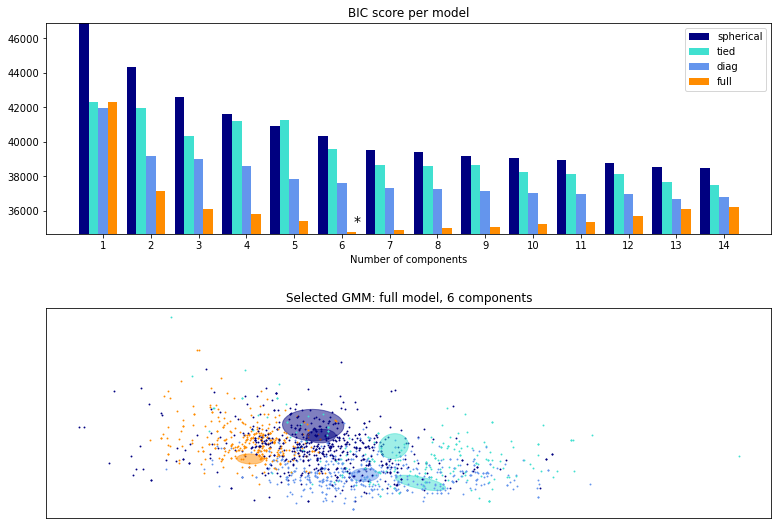

In [40]:
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl


temp_data = X_pca

lowest_bic = np.infty
bic = []
n_components_range = range(1, 15)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(temp_data)
        bic.append(gmm.bic(temp_data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
print(lowest_bic)
print(bic)
bic = np.array(bic)
color_iter = itertools.cycle(
    ["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(13, 8))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range): (i + 1)
                * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(temp_data)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(np.array(temp_data)[Y_ == i, 0], np.array(X)
                [Y_ == i, 1], 0.8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()


D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have

19952.50156135706
[46283.911432919354, 41566.13164920444, 39028.2051559143, 37593.83462930899, 37853.82808021938, 35609.04966925664, 35425.81781163885, 35353.72316407201, 34564.301439302035, 34438.37410567695, 34095.35737116448, 33384.03568202847, 32907.14214506815, 33221.90617161167, 32407.821602112315, 32391.658437949012, 32328.071185973942, 32309.805934082007, 31989.690617528475, 31805.937260400242, 27288.657667598967, 26924.886341115744, 26749.751093786548, 26077.888297935584, 25236.012723621916, 24442.135438564757, 23590.17975523921, 24149.250827434313, 23087.246531810124, 22849.289834393152, 22986.52344386529, 23057.559499869145, 21931.934042743516, 22797.9445288965, 22274.942390151788, 22515.206046238316, 21680.777442787865, 21750.93292809451, 21771.267536858475, 21468.437105044464, 44275.96154861557, 39069.198628037724, 36564.52288897963, 34982.68601318987, 34010.84547213318, 33711.07826873572, 33060.93878438964, 32977.19514646031, 32369.23702034595, 31763.788825011907, 31909.3

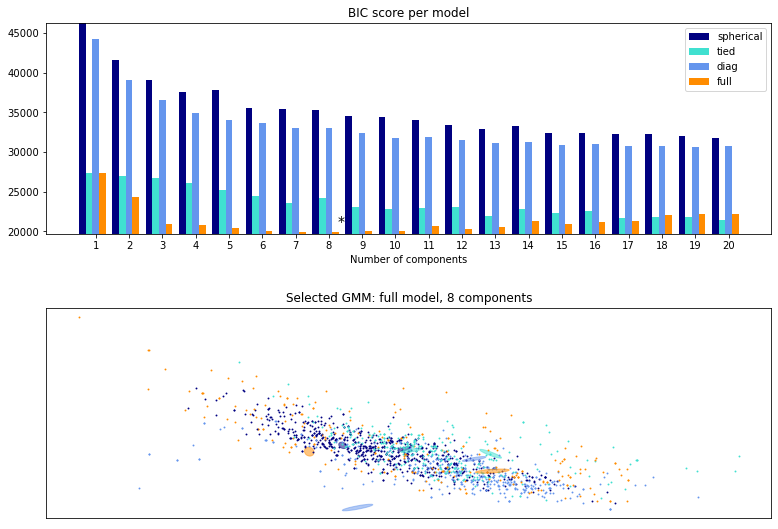

In [41]:
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl


temp_data = X_rp

lowest_bic = np.infty
bic = []
n_components_range = range(1, 21)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(temp_data)
        bic.append(gmm.bic(temp_data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
print(lowest_bic)
print(bic)
bic = np.array(bic)
color_iter = itertools.cycle(
    ["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(13, 8))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range): (i + 1)
                * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(temp_data)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(np.array(temp_data)[Y_ == i, 0], np.array(X)
                [Y_ == i, 1], 0.8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()


D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have

30312.506181235985
[39675.237252927545, 37692.92061106849, 37146.436757082934, 36464.37107858604, 36193.63694978817, 35547.17683716331, 35453.62200225519, 34711.877705633815, 34516.82557148905, 34553.1694993229, 34471.56074236794, 34210.72646606138, 34092.42265785601, 33941.07610305553, 33849.647150896926, 33961.99924850318, 33667.20014780613, 33649.34830430391, 33516.91585992269, 33442.7780849258, 36910.31930700861, 36425.968867333264, 36034.790753355526, 35869.259909202934, 33619.39706599016, 35716.201344584886, 33435.37372572225, 33279.522898377385, 33199.86316748355, 32897.96655836067, 32911.93220349833, 33179.81973289503, 32995.51760817305, 32438.434257445373, 32162.775571664468, 32270.716321605756, 31647.35943960815, 32184.78326151689, 31654.470460440654, 31858.662920508938, 36578.348289931084, 34259.88179635966, 33769.236558490265, 33454.67519089413, 33485.42496517217, 33241.96980989022, 32771.31951032964, 32735.691151787167, 32425.26666618897, 32295.393647031677, 32490.57880324

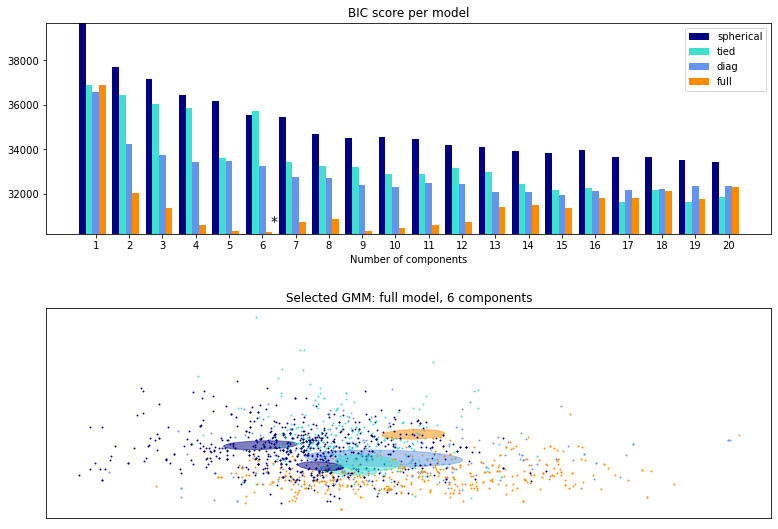

In [42]:
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl


temp_data = X_fa

lowest_bic = np.infty
bic = []
n_components_range = range(1, 21)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(temp_data)
        bic.append(gmm.bic(temp_data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
print(lowest_bic)
print(bic)
bic = np.array(bic)
color_iter = itertools.cycle(
    ["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(13, 8))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range): (i + 1)
                * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(temp_data)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(np.array(temp_data)[Y_ == i, 0], np.array(X)
                [Y_ == i, 1], 0.8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()


## Plot: time, silhouette, ami

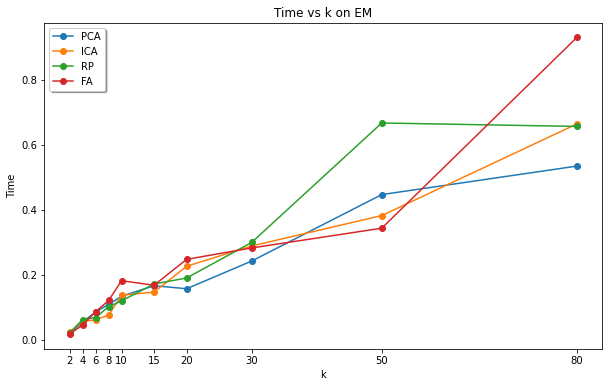

In [43]:
# time
fig, g = plt.subplots(1, 1, figsize=size)
for algo in names:
    plt.xticks(ks_kmeans, ks_kmeans)
    # plt.setp(g, xticks=ks, xticklabels=ks)
    g.set_title("Time vs k on EM")
    g.set_ylabel('Time')
    g.set_xlabel('k')
    g.plot(ks_gmm, time_gmm[algo], label=algo, marker='o')
    g.legend(shadow=True, fancybox=True)


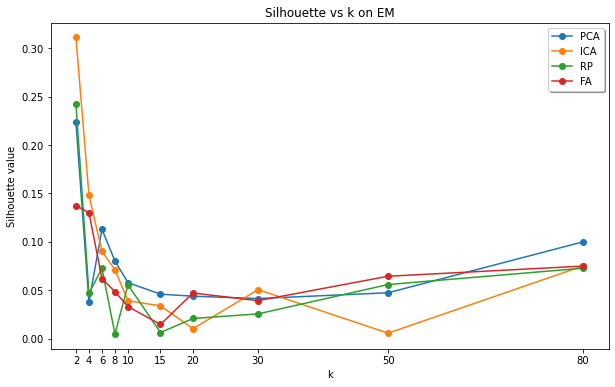

In [44]:
# Silhouette
fig, g = plt.subplots(1, 1, figsize=size)
for algo in names:
    plt.xticks(ks_kmeans, ks_kmeans)
    # plt.setp(g, xticks=ks, xticklabels=ks)
    g.set_title("Silhouette vs k on EM")
    g.set_ylabel('Silhouette value')
    g.set_xlabel('k')
    g.plot(ks_gmm, silhouette_gmm[algo], label=algo, marker='o')
    g.legend(shadow=True, fancybox=True)


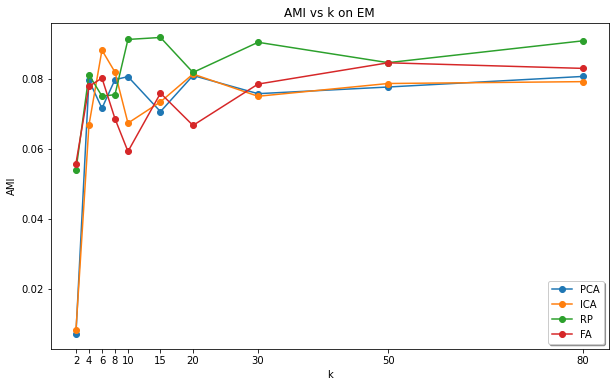

In [45]:
# Silhouette
fig, g = plt.subplots(1, 1, figsize=size)
for algo in names:
    plt.xticks(ks_kmeans, ks_kmeans)
    # plt.setp(g, xticks=ks, xticklabels=ks)
    g.set_title("AMI vs k on EM")
    g.set_ylabel('AMI')
    g.set_xlabel('k')
    g.plot(ks_gmm, ami_gmm[algo], label=algo, marker='o')
    g.legend(shadow=True, fancybox=True)


## Pick best k and output their silhouette and nmi value

In [46]:
best_ks_gmm = {'PCA': None, 'ICA': None, 'RP': None, 'FA': None}

In [47]:
silhouette_gmm['ICA']

[0.31088989944259315,
 0.14807628596338862,
 0.090394228513736,
 0.07121847368317594,
 0.03929543682285201,
 0.03406184127445013,
 0.010522521065592781,
 0.05079671200912084,
 0.0058990122904398565,
 0.07527349832045216]

In [64]:
ami_gmm['ICA']

[0.008049215002255921,
 0.06672906374900266,
 0.08816927713662022,
 0.08188843944910298,
 0.0673072645202066,
 0.07338238834280626,
 0.08133491497700077,
 0.07497980755836281,
 0.07862939917716393,
 0.0791633475101755]

In [49]:
# supervised silhouette & ami value
for algo in names:
    print(algo, end=': ')
    print(silhouette_gmm[algo][0])
    print(ami_gmm[algo][0])


PCA: 0.22321369435083094
0.007030880328661457
ICA: 0.31088989944259315
0.008049215002255921
RP: 0.2423811732577513
0.0538031560807562
FA: 0.13748260915860797
0.05571247876026454


In [50]:
print("\tbest k\tSilhouette\tNMI")
for algo in names:
    print(algo, end='\t')
    best_ks_gmm[algo] = ks_gmm[np.argmax(silhouette_gmm[algo])]
    print(best_ks_gmm[algo], end='\t')
    print('%.4f'%silhouette_gmm[algo][0], end='\t\t')
    print('%.4f' % ami_gmm[algo][0], end='\n')


	best k	Silhouette	NMI
PCA	2	0.2232		0.0070
ICA	2	0.3109		0.0080
RP	2	0.2424		0.0538
FA	2	0.1375		0.0557


In [67]:
print("\tbest k\tSilhouette\tNMI")
for algo in names:
    print(algo, end='\t')
    best_ks_gmm[algo] = ks_gmm[np.argmax(ami_kmeans[algo])]
    print(best_ks_gmm[algo], end='\t')
    print('%.4f'%silhouette_gmm[algo][ks_gmm.index(best_ks_gmm[algo])], end='\t\t')
    print('%.4f' % ami_gmm[algo][ks_gmm.index(best_ks_gmm[algo])], end='\n')


	best k	Silhouette	NMI
PCA	10	0.0580		0.0806
ICA	20	0.0105		0.0813
RP	80	0.0729		0.0908
FA	2	0.1375		0.0557


In [66]:
print("Remember to compare with the initial performance of the model!")


Remember to compare with the initial performance of the model!
